In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchvision.models import ResNet18_Weights
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)


for param in resnet.parameters():
    param.requires_grad = False

#final layer is chnged to CIFAR-10 (10 classes)
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)  # Only training final layer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)  # Only training final layer

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            running_loss = 0.0
    print(f"Epoch: [{epoch + 1}], loss: {running_loss / 100:.3f}")

print("model trained!")

Epoch: [1], loss: 0.529
Epoch: [2], loss: 0.499
Epoch: [3], loss: 0.494
Epoch: [4], loss: 0.468
Epoch: [5], loss: 0.463
Epoch: [6], loss: 0.463
Epoch: [7], loss: 0.466
Epoch: [8], loss: 0.468
Epoch: [9], loss: 0.452
Epoch: [10], loss: 0.462
model trained!


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 80.04%


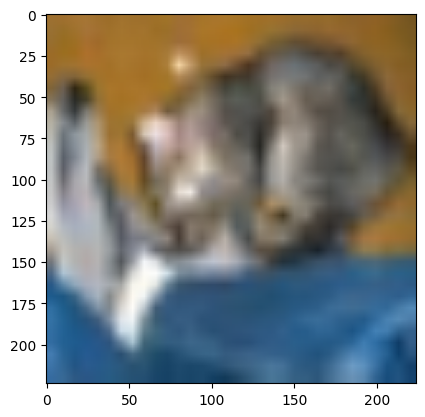

Predicted: cat, Actual: cat


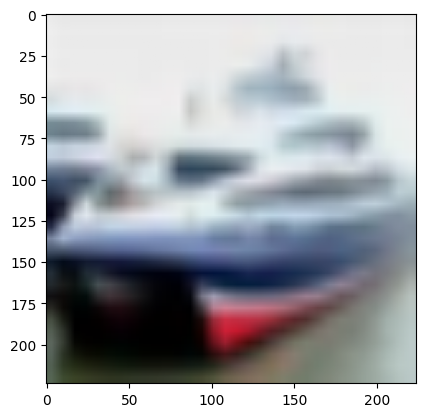

Predicted: ship, Actual: ship


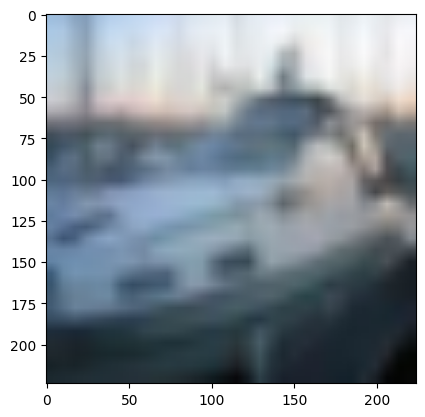

Predicted: ship, Actual: ship


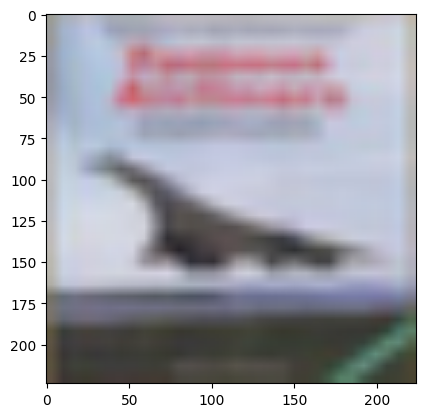

Predicted: plane, Actual: plane


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(torch.permute(img, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = resnet(images.to(device))
_, predicted = torch.max(outputs, 1)

for i in range(4):
    imshow(images[i])
    print(f"Predicted: {classes[predicted[i]]}, Actual: {classes[labels[i]]}")